In [1]:
import pandas as pd 
import numpy as np
import math
import keras
import tensorflow as tf
import progressbar
import os
from os import listdir
from matplotlib import pyplot

## Some useful functions

In [2]:
def prepare_data(class_data): 
    np.random.shuffle(class_data)
    y = class_data_low[:,0]
    x = class_data_low[:,1:10]
    train_split = 0.85
    train_limit = int(len(y)*train_split)
    print("Training sample of: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))
    x_train = x[:train_limit]
    x_val = x[train_limit:]
    y_train = y[:train_limit]
    y_val = y[train_limit:]
    if np.isnan(np.min(y)) == False:
        return x_train, y_train, x_val, y_val

In [3]:
def plot_histo(x, y, bins,logscale):
    y = np.array(y)
    pyplot.hist(y, bins, color = 'indianred', alpha=0.5, label='Osiris')
    pyplot.legend(loc='upper right')
    pyplot.xlabel('Probability')
    if logscale == 1:
        pyplot.yscale('log')
    pyplot.title('Trained on ($p_e$, $p_{\gamma}$, $\omega_e$, $\omega_{\gamma}$, n)')
    pyplot.show()

## Data-set loading

In [4]:
def loaddata(name):
     return np.loadtxt(name, delimiter=',')

In [5]:
class_data_low = loaddata("../final_data/{}.csv".format('0-10'))
class_data_high = loaddata("../final_data/{}.csv".format('0-50'))
class_data_shigh = loaddata("../final_data/{}.csv".format('0-100'))

In [6]:
x0_train, y0_train, x0_val, y0_val = prepare_data(class_data_low)
x1_train, y1_train, x1_val, y1_val = prepare_data(class_data_high)
x2_train, y2_train, x2_val, y2_val = prepare_data(class_data_shigh)

Training sample of: 2099605 
Valuation sample: 370519
Training sample of: 2099605 
Valuation sample: 370519
Training sample of: 2099605 
Valuation sample: 370519


## Our beautiful probability distributions 

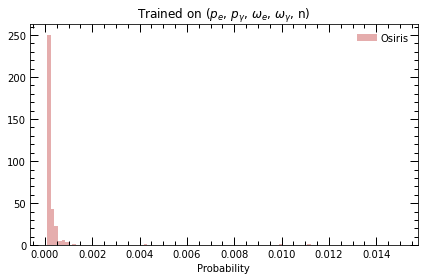

In [7]:
bins = np.linspace(0.0001, 0.015, 100)
plot_histo(x0_train,y0_train,bins,0)

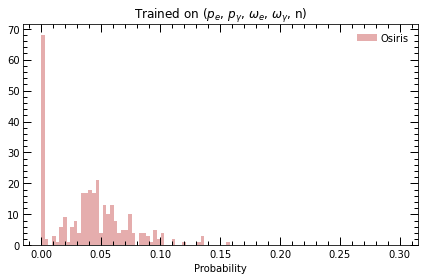

In [8]:
bins = np.linspace(0.0003, 0.3, 100)
plot_histo(x1_train,y1_train,bins,0)

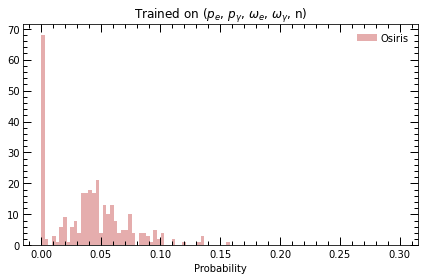

In [9]:
bins = np.linspace(0.0003, 0.3, 100)
plot_histo(x2_train,y2_train,bins,0)

In [10]:
x_train = np.vstack((x0_train,x1_train,x2_train))
x_val = np.vstack((x0_val,x1_val,x2_val))
y_train = np.vstack((y0_train,y1_train,y2_train))
y_val = np.vstack((y0_val,y1_val,y2_val))

## Model Load

In [11]:
model = keras.models.load_model("../models/{}_highenergy0013.h5".format('probability'))

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 9)                 36        
_________________________________________________________________
dense_9 (Dense)              (None, 12)                120       
_________________________________________________________________
dense_10 (Dense)             (None, 9)                 117       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 10        
Total params: 283
Trainable params: 265
Non-trainable params: 18
_________________________________________________________________


## The prediction of our net

In [13]:
y_pred0 = model.predict(x0_train)

ValueError: in user code:

    /usr/local/lib/python3.9/site-packages/keras/engine/training.py:1544 predict_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.9/site-packages/keras/engine/training.py:1527 run_step  *
        outputs = model.predict_step(data)
    /usr/local/lib/python3.9/site-packages/keras/engine/training.py:1500 predict_step  *
        return self(x, training=False)
    /usr/local/lib/python3.9/site-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.9/site-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis 1 of input shape to have value 9 but received input with shape (None, 8)


In [ ]:
y_pred0

## The final comparison between the probabilities

In [ ]:
from matplotlib import pyplot
y0_train = np.array(y0_train)
bins = np.linspace(0.0004, 0.013, 60)
pyplot.hist(y0_train, bins, color = 'indianred', alpha=0.5, label='Osiris')
pyplot.hist(y_pred0, bins, color = 'mediumslateblue', alpha=0.5, label='NN')
pyplot.yscale('log')
pyplot.legend(loc='upper right')
pyplot.xlabel('Probability')
pyplot.title('Trained on ($p_e$, $p_{\gamma}$, $\omega_e$, $\omega_{\gamma}$, n)')
pyplot.show()

In [ ]:
from matplotlib import pyplot
y1 = np.array(y1)
bins = np.linspace(0.001, 0.013, 100)
pyplot.hist(y1, bins, color = 'indianred', alpha=0.5, label='Osiris')
pyplot.hist(y_pred1, bins, color = 'mediumslateblue', alpha=0.5, label='NN')
#pyplot.yscale('log')
pyplot.legend(loc='upper right')
pyplot.xlabel('Probability')
pyplot.title('Trained on ($p_e$, $p_{\gamma}$, $\omega_e$, $\omega_{\gamma}$, n)')
pyplot.show()